---
title: Gasoline Prices in Mexico
subtitle: F*uel Price Fluctuations, A Constant Concern*
date: '2025-02-03'
date-format: MMM, YYYY
author: Jesus L. Monroy
abstract: |
  Gasoline prices in Mexico are a complex issue influenced by various factors.
   In this article we examine the gasoline prices in the 32 States that constitute Mexico and also their differences in cost, sale price and profits.
  Challenges remain in stabilizing prices and mitigating the impact on consumers and the economy.
format:
  html:
    grid:
      sidebar-width: 200px
      body-width: 950px
      margin-width: 150px
    reference-location: margin
    fig-cap-location: margin
    other-links:
      - text: Medium
        icon: medium
        href: https://medium.com/@jesus_lmonroy
      - text: Linkedin
        icon: linkedin
        href: https://www.linkedin.com/in/j3sus-lmonroy
      - text: Twitter
        icon: twitter
        href: https://x.com/j3suslm
    page-layout: full
    embed-resources: true
    code-fold: show
    code-summary: Show code
    code-tools:
      source: false
      toggle: true
      caption: code
    toc: true
    toc-depth: 2
    toc-location: left
    toc-title: Contents
    html-math-method: katex
    colorlinks: true
    execute:
      echo: true
    mainfont: Helvetica Neue
code-line-numbers: false
code-copy: false
code-overflow: wrap
jupyter:
  jupytext:
    formats: ipynb,qmd
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.16.1
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

In [1]:
import polars as pl
import duckdb as db
import plotly.express as px
from plotnine import *

### Connect to database

In [2]:
conn = db.connect('my_database.db')

### Create dataframe

In [3]:
df = conn.sql('select * from gas_stations').pl()

### Close database connection

In [4]:
conn.close()

### Table overview

In [5]:
df = (
    df.select('entidad'
              , 'municipio'
              , 'precio_tar'
              , 'precio_vendedores'
              , 'ganancia')
        .rename({
            'entidad':'state',
            'municipio':'municipality',
            'precio_tar':'gasoline_cost',
            'precio_vendedores':'sale_price',
            'ganancia':'profit',
        })
).with_columns(
    (pl.col('profit')/pl.col('gasoline_cost')).alias('profit%'),
    mun_state=pl.col('municipality')+', '+pl.col('state')
)

In [8]:
df.select(pl.exclude('mun_state')).head()

state,municipality,gasoline_cost,sale_price,profit,profit%
str,str,f64,f64,f64,f64
"""CHIHUAHUA""","""JUAREZ""",21.63,23.308453,1.678453,0.077598
"""COAHUILA DE ZARAGOZA""","""SABINAS""",21.63,23.308453,1.678453,0.077598
"""COAHUILA DE ZARAGOZA""","""TORREON""",21.63,23.308453,1.678453,0.077598
"""DURANGO""","""GOMEZ PALACIO""",21.63,23.308453,1.678453,0.077598
"""NUEVO LEON""","""ABASOLO""",21.63,23.308453,1.678453,0.077598


In [9]:
#| tbl-cap: Dataset preview

( 
    df.select(pl.exclude('mun_state'))
        .to_pandas()
        .head()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

state,municipality,gasoline_cost,sale_price,profit,profit%
CHIHUAHUA,JUAREZ,$21.63,$23.31,$1.68,7.76%
COAHUILA DE ZARAGOZA,SABINAS,$21.63,$23.31,$1.68,7.76%
COAHUILA DE ZARAGOZA,TORREON,$21.63,$23.31,$1.68,7.76%
DURANGO,GOMEZ PALACIO,$21.63,$23.31,$1.68,7.76%
NUEVO LEON,ABASOLO,$21.63,$23.31,$1.68,7.76%


### Group data by State

In [10]:
states = (
        df.group_by('state')
            .agg(pl.col('gasoline_cost','sale_price','profit', 'profit%').mean())
            .sort('state')
        )

### Group data by municipality

In [11]:
municipalities = (
        df.group_by('mun_state')
            .agg(pl.col('gasoline_cost','sale_price','profit','profit%').mean())
            .sort('mun_state')
        )

## Top 05 States with highest gasoline prices

In [12]:
#| tbl-cap: Top 05 States with highest prices

(
    states
        .top_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

state,gasoline_cost,sale_price,profit,profit%
QUINTANA ROO,$21.46,$24.80,$3.34,15.55%
YUCATAN,$21.46,$24.79,$3.33,15.52%
NAYARIT,$22.54,$24.76,$2.23,9.90%
GUERRERO,$22.37,$24.76,$2.39,10.67%
SINALOA,$22.36,$24.72,$2.36,10.59%


## Top 05 States with lowest gasoline prices

In [13]:
#| tbl-cap: Top 05 States with lowest prices

(
    states
        .bottom_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

state,gasoline_cost,sale_price,profit,profit%
TAMAULIPAS,$21.22,$23.10,$1.87,8.79%
COAHUILA DE ZARAGOZA,$22.25,$23.12,$0.87,4.01%
CHIHUAHUA,$21.47,$23.36,$1.89,8.90%
NUEVO LEON,$21.41,$23.40,$1.99,9.32%
VERACRUZ DE IGNACIO DE LA LLAVE,$21.59,$23.44,$1.86,8.62%


## Top 05 Municipalities with highest gasoline prices

In [14]:
#| tbl-cap: Top 05 Municipalities with highest prices

(
    municipalities
        .top_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

mun_state,gasoline_cost,sale_price,profit,profit%
"NUEVA ITALIA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"ZIRACUARETIRO, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"GABRIEL ZAMORA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"HUIRAMBA, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%
"NAHUATZEN, MICHOACAN DE OCAMPO",$22.52,$25.17,$2.65,11.78%


## Top 05 Municipalities with lowest gasoline prices

In [15]:
#| tbl-cap: Top 05 Municipalities with lowest prices

(
    municipalities
        .bottom_k(5, by='sale_price')
        .to_pandas()
        .style
        .hide()    
        .format({'gasoline_cost': '${:,.2f}',
                 'sale_price': '${:.2f}',
                 'profit': '${:.2f}',
                 'profit%': '{:.2%}',})
)

mun_state,gasoline_cost,sale_price,profit,profit%
"ANAHUAC, NUEVO LEON",$20.57,$20.74,$0.17,0.84%
"CD. GUERRERO, TAMAULIPAS",$20.57,$20.74,$0.17,0.84%
"LAMPAZOS DE NARANJO, NUEVO LEON",$20.57,$20.74,$0.17,0.84%
"ALLENDE, COAHUILA DE ZARAGOZA",$22.59,$21.02,$-1.57,-6.94%
"MORELOS, COAHUILA DE ZARAGOZA",$22.59,$21.02,$-1.57,-6.94%


# Average Gasoline Price by State

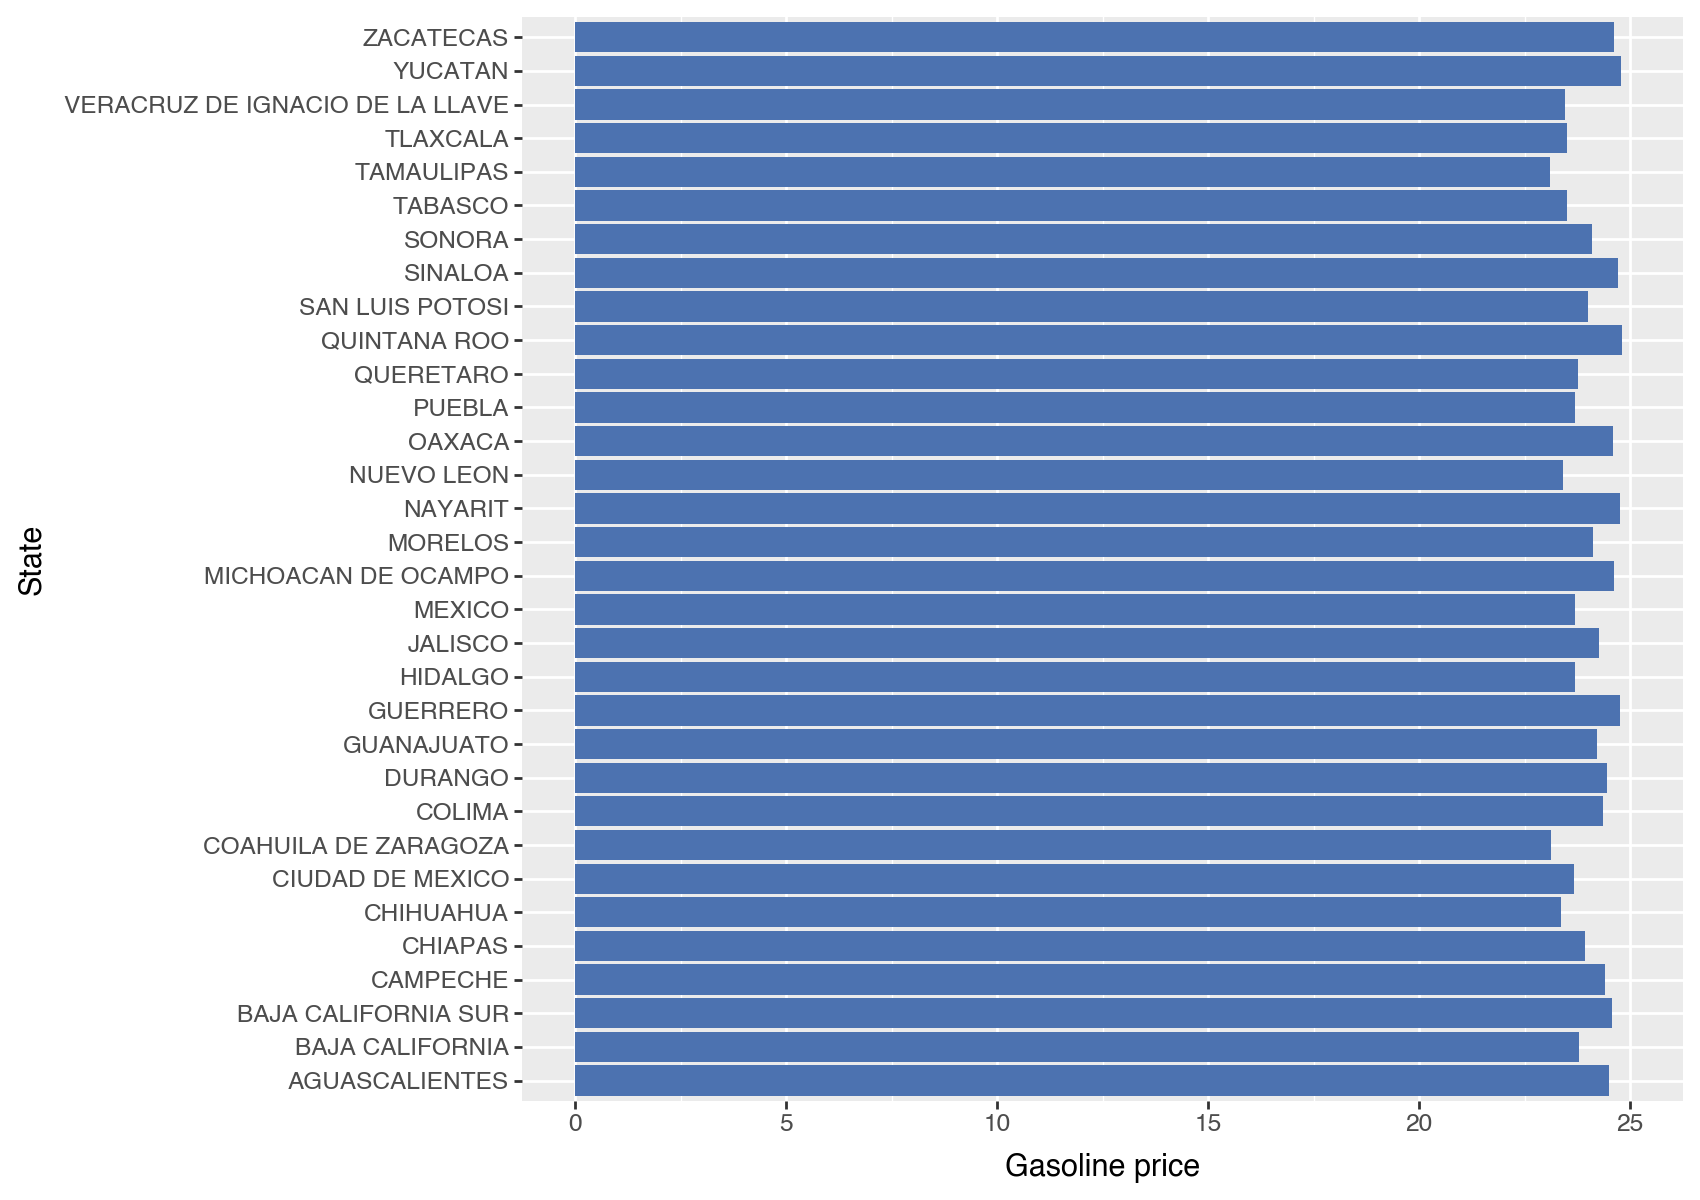

In [16]:
#| label: fig-states
#| fig-cap: Average Gasoline Prices by State

(
    ggplot(states, mapping=aes(x='state', y='sale_price'))
        + geom_bar(stat='identity', fill="#4c72b0")
        + coord_flip()
        + scale_y_continuous(limits=(0, 25))
        + labs(x='State',
               y='Gasoline price')
        + theme(axis_text_y=element_text(rotation=0),
               figure_size=(8.5, 6))
)

# Profit by State

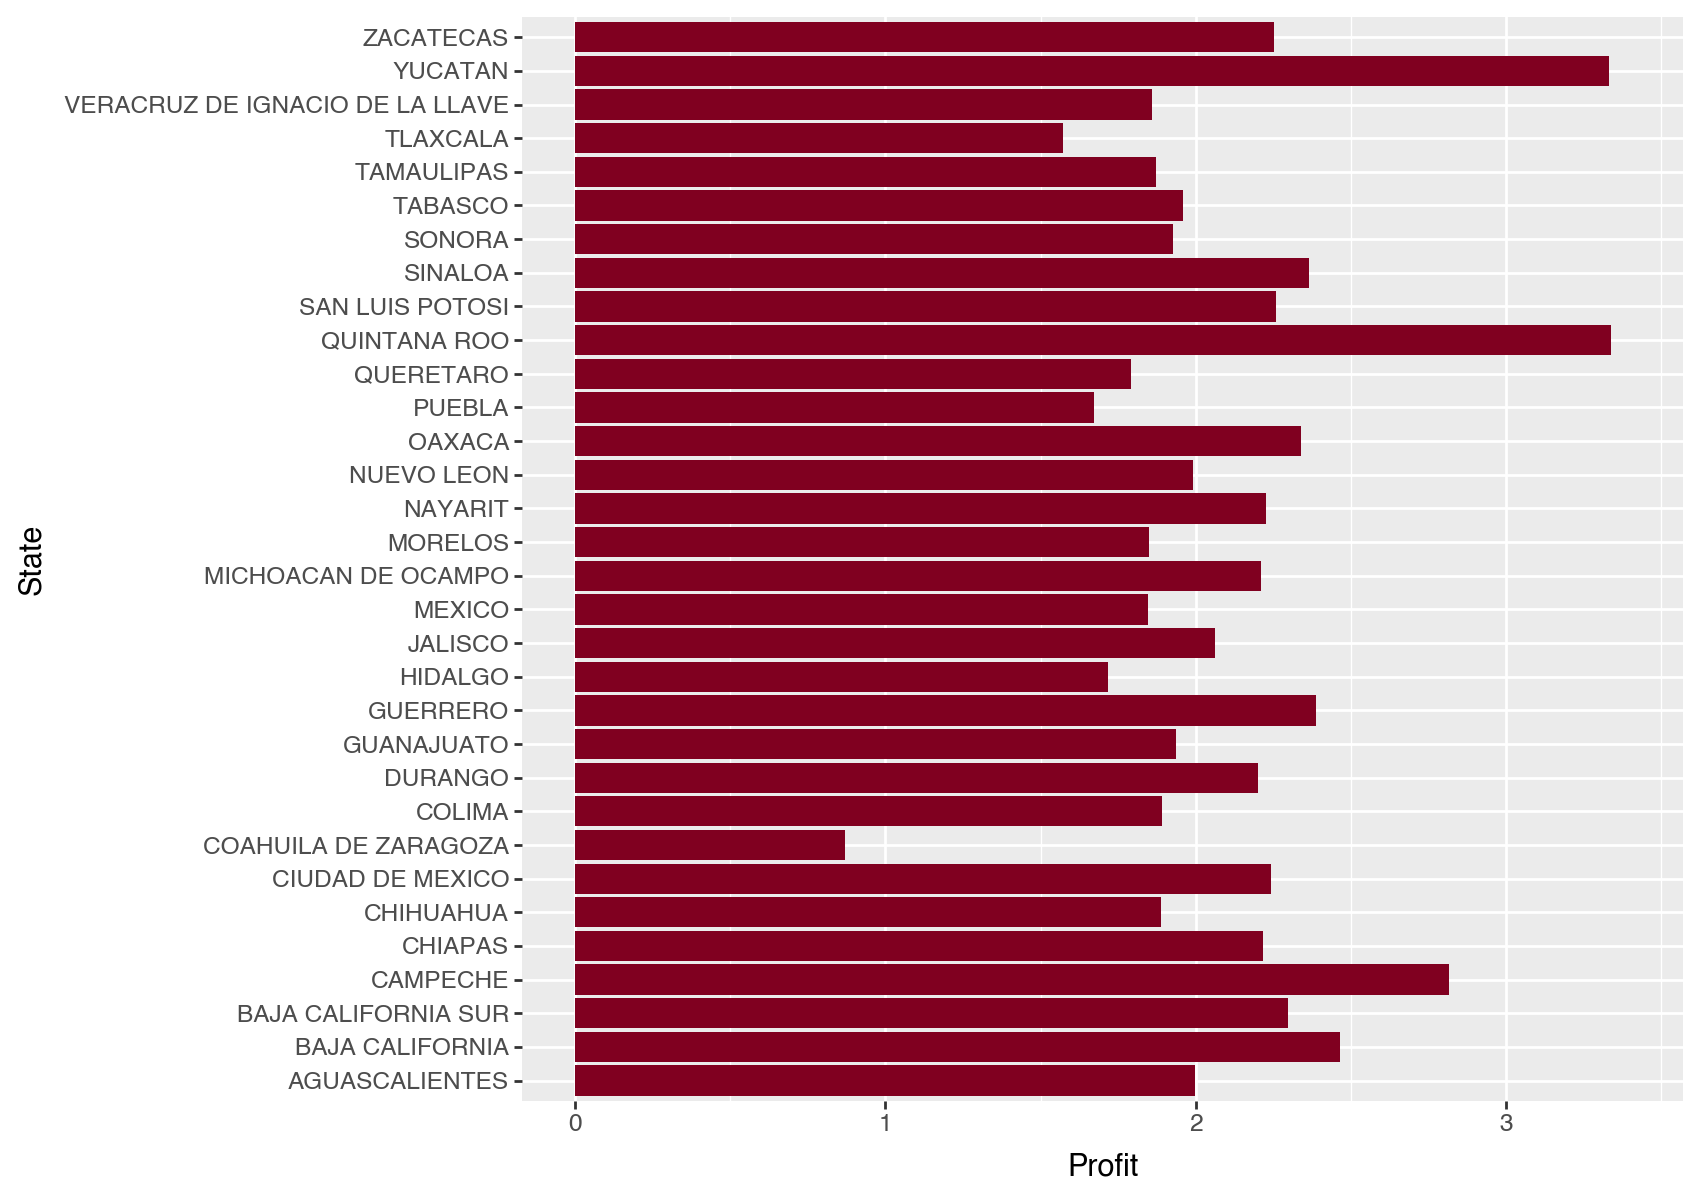

In [17]:
#| label: fig-states-profit
#| fig-cap: Profit by State

(
    ggplot(states, mapping=aes(x='state', y='profit'))
        + geom_bar(stat='identity', fill="#800020")
        + coord_flip()
        + scale_y_continuous(limits=(0, 3.4))
        + labs(x='State',
               y='Profit')
        + theme(axis_text_y=element_text(rotation=0),
               figure_size=(8.5, 6))
)

# Dispersion of Gasoline Prices

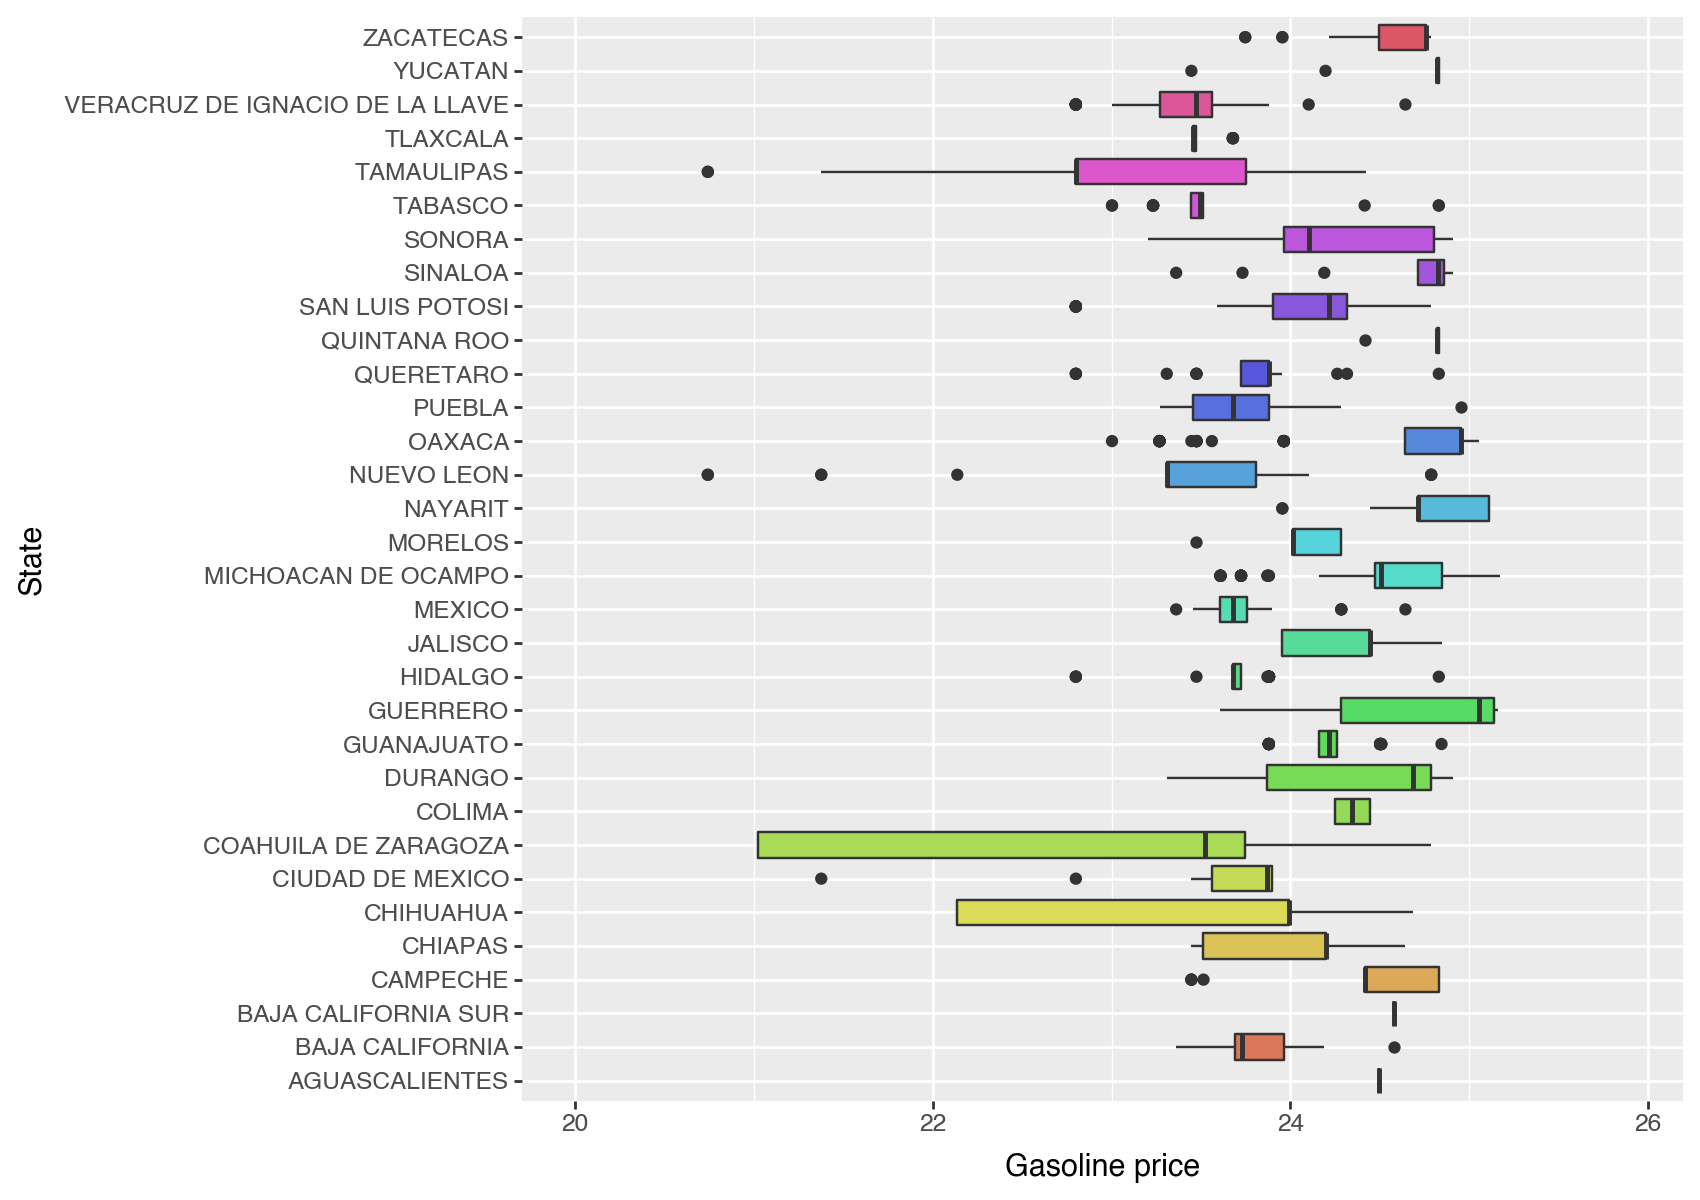

In [18]:
#| label: fig-municipalities
#| fig-cap: Dispersion of Gasoline Prices by State

(
    ggplot(data=df, mapping=aes(x='state', y='sale_price', fill='state')) 
    + geom_boxplot()
    + coord_flip()
    + scale_y_continuous(limits=(20, 25.9))
    + labs(x='State',
           y='Gasoline price')
    + theme(legend_position='none',
           figure_size=(8.5, 6))
)

# Dispersion of Profits

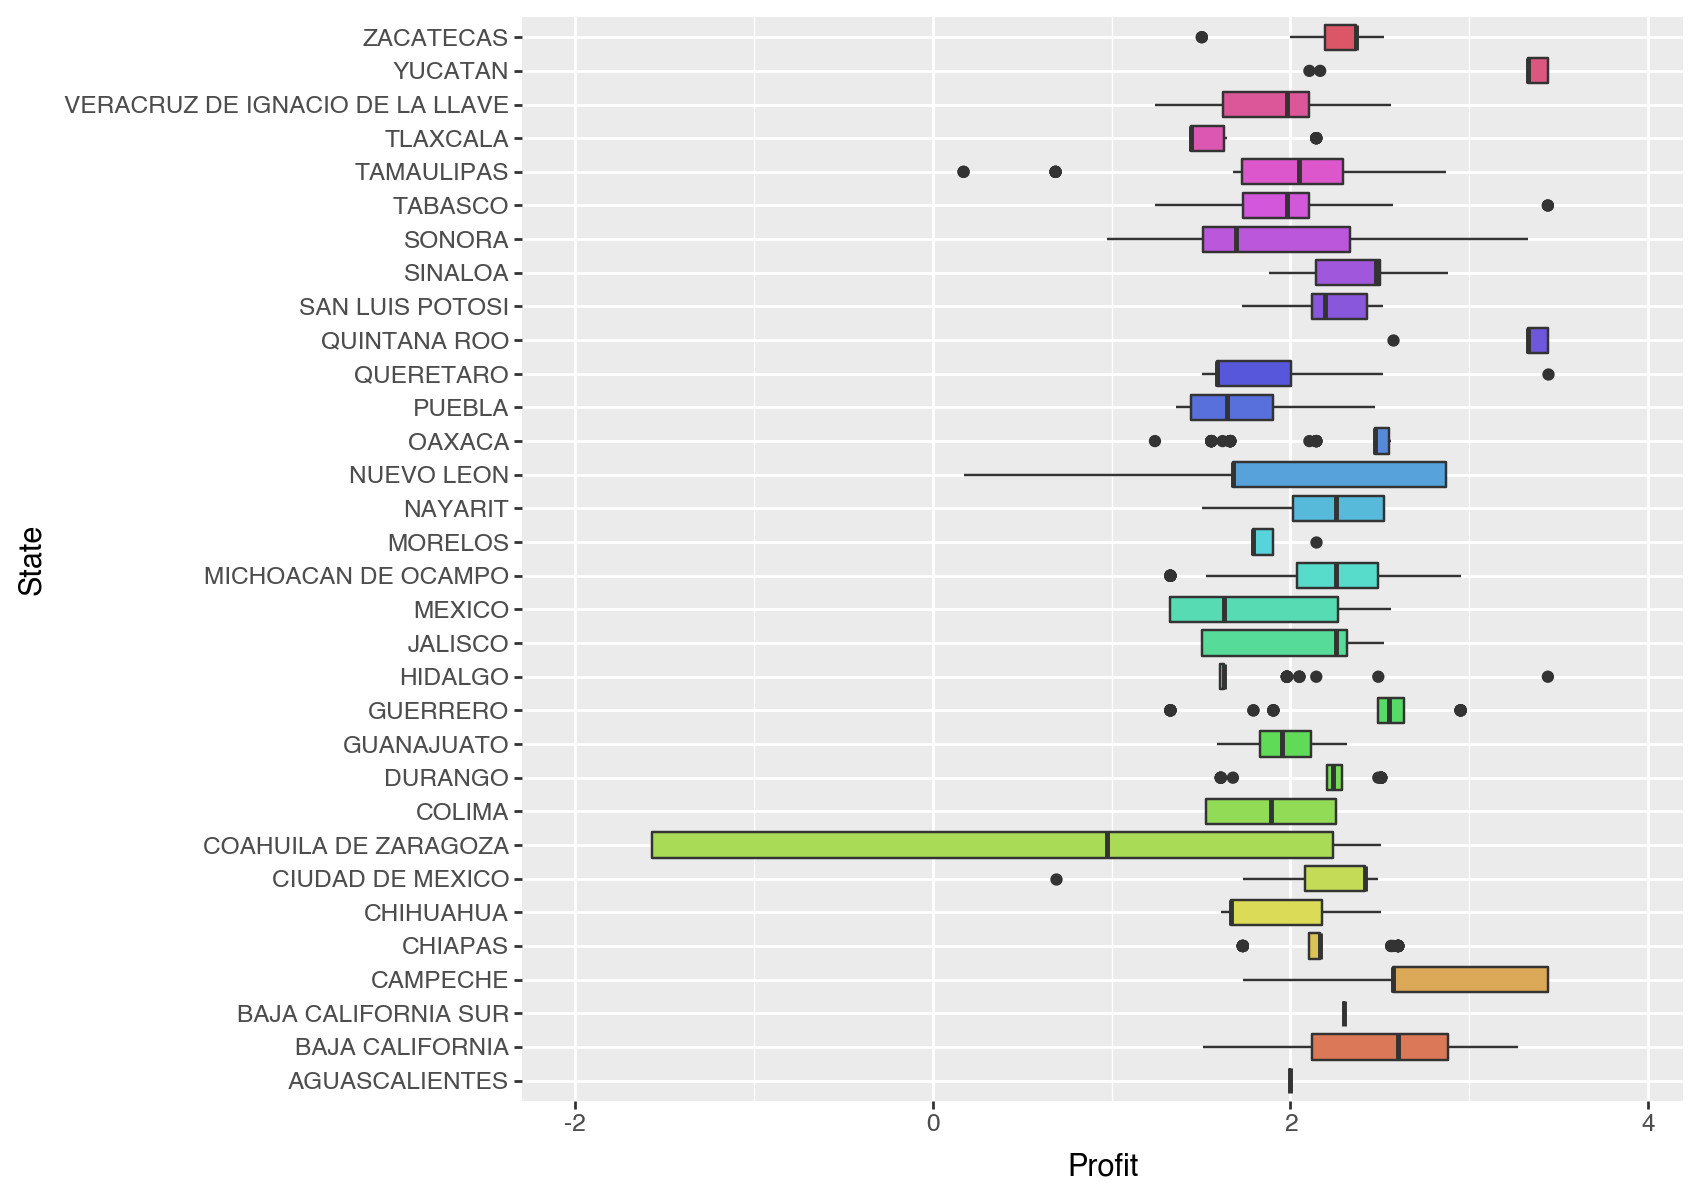

In [19]:
#| label: fig-municipalities-profit
#| fig-cap: Dispersion of Profits by State

(
    ggplot(data=df, mapping=aes(x='state', y='profit', fill='state')) 
    + geom_boxplot()
    + coord_flip()
    + scale_y_continuous(limits=(-2, 3.9))
    + labs(x='State',
           y='Profit')
    + theme(legend_position='none',
           figure_size=(8.5, 6))
)

# Geographical Distribution

::: {#fig-datawrapper}
```{=html}
<iframe width="840" height="700" src="https://datawrapper.dwcdn.net/gXnz2/2/" title="Datawrapper chart" data-external="1"></iframe>
```
Gasoline Sale Prices by State in Mexico
:::

# Conclusions

In most states, filling a 40-liter car tank costs around $1,000 pesos.

While precise price predictions are difficult, it's reasonable to expect continued volatility in gasoline prices in Mexico during 2025.

The interplay of global oil markets, government policies, and domestic economic conditions will create a dynamic environment.
Consumers should be prepared for potential price fluctuations and consider strategies for managing their fuel expenses.

The energy sector, meanwhile, will be closely watched as Mexico navigates the complex challenges of ensuring affordable and accessible fuel for its population. 

The future of gasoline prices in Mexico remains uncertain, but one thing is clear: it will continue to be a topic of significant importance for both consumers and policymakers.

# Contact

**Jesus L. Monroy**
<br>
*Economist & Data Scientist*

[Medium](https://medium.com/@jesus_lmonroy) | [Linkedin](https://www.linkedin.com/in/j3sus-lmonroy) | [Twitter](https://www.twitter.com/sqlalchemist)